<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/5_3%20%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CIFAR_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
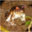

In [ ]:
x_train[0]

<ipython-input-10-4579970f5674>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[idx])])


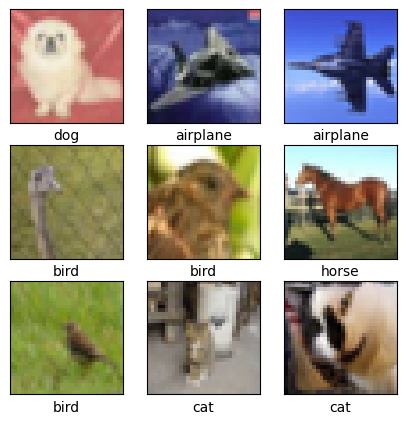

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sample_size = 9
random_idx = np.random.randint(50000, size=sample_size)
plt.figure(figsize=(5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[idx])
    plt.xlabel(class_names[int(y_train[idx])])
plt.show()

In [ ]:
# 전처리 과정
x_mean = np.mean(x_train, axis=(0, 1, 2))
x_std = np.std(x_train, axis=(0, 1, 2))

# x - x.mean /x.std
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [ ]:
np.mean(x_train,axis = (0)).shape

(32, 32, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)


In [ ]:
# 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 2, padding = 'same',
                 activation = 'relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 2, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# y는 원핫인코딩 안하고 sparse 사용함

In [ ]:
# 모델 학습하기
history = model.fit(x_train, y_train, epochs = 30, batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - acc: 0.3620 - loss: 1.7108 - val_acc: 0.5813 - val_loss: 1.1539
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.6408 - loss: 1.0126 - val_acc: 0.6947 - val_loss: 0.8692
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.7303 - loss: 0.7638 - val_acc: 0.7180 - val_loss: 0.8140
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.7867 - loss: 0.6117 - val_acc: 0.7401 - val_loss: 0.7474
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.8281 - loss: 0.4932 - val_acc: 0.7356 - val_loss: 0.8380
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.8581 - loss: 0.4016 - val_acc: 0.7409 - val_loss: 0.8497
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.8830 - loss: 0.3246 - val_acc: 0.7481 - val_loss: 0.8375
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.9110 - loss: 0.2496 - val_acc: 0.7591 - val_loss: 0.9221
Epoch 9/30
1094/1094 ━━━━━━━━━━━━━━━━

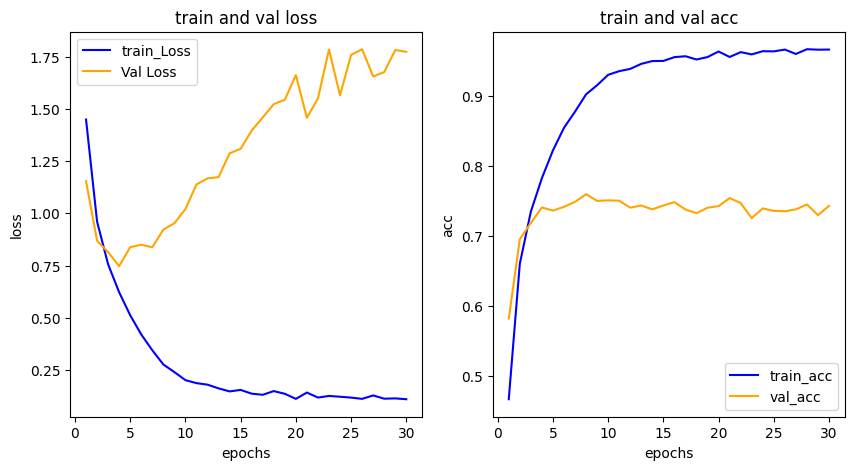

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# 신경망 시각화해보기

import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    if(len(feature_map.shape)==4):
      img_size = feature_map.shape[1]
      featuresw = feature_map.shape[-1]

      display_grid = np.zeros((img_size, img_size * features))

      for i in range(features):
        x = feature_map[0, :, :, i]
        x -= x.mean(); x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * img_size : (i + 1) * img_size] = x

      plt.figure(figsize= (features, 2+1./features))
      plt.title(layer_name, fontsize = 20)
      plt.grid(False)
      plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')


ValueError: The layer sequential_2 has never been called and thus has no defined input.

In [ ]:
c

In [ ]:
# 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1,l1_l2

model = Sequential()
model.add(Input(shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 2, padding = 'same',
                 activation = 'relu', kernal_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Flatten())
model.add(Dense(256, activation = 'relu',kernal_regularizer = l2(0.001)))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
# 모델 학습하기
history = model.fit(x_train, y_train, epochs = 30, batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - acc: 0.3397 - loss: 1.9630 - val_acc: 0.5687 - val_loss: 1.2966
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.6027 - loss: 1.2341 - val_acc: 0.6435 - val_loss: 1.1371
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.6863 - loss: 1.0368 - val_acc: 0.6779 - val_loss: 1.0742
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.7287 - loss: 0.9271 - val_acc: 0.7183 - val_loss: 0.9688
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.7567 - loss: 0.8493 - val_acc: 0.7365 - val_loss: 0.9130
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.7815 - loss: 0.7965 - val_acc: 0.7524 - val_loss: 0.8876
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.8007 - loss: 0.7506 - val_acc: 0.7541 - val_loss: 0.8973
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.8119 - loss: 0.7182 - val_acc: 0.7501 - val_loss: 0.9274
Epoch 9/30
1094/1094 ━━━━━━━━━━━━━━━━

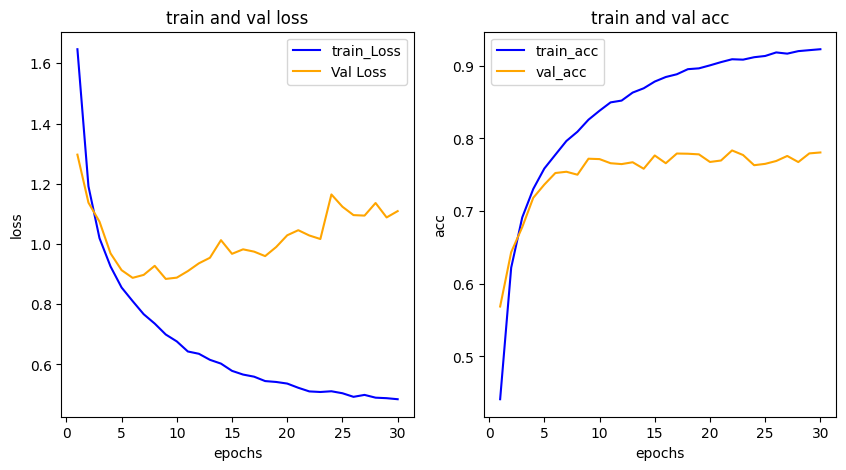

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# 모델 구성, 드롭아웃
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Dropout(0,2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Dropout(0,2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Dropout(0,2))
model.add(Flatten())
model.add(Dense(256, activation = 'relu',))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
# 모델 학습하기
history = model.fit(x_train, y_train, epochs = 30, batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - acc: 0.3622 - loss: 1.7020 - val_acc: 0.5949 - val_loss: 1.1404
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.6472 - loss: 0.9973 - val_acc: 0.6861 - val_loss: 0.8849
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.7355 - loss: 0.7465 - val_acc: 0.7332 - val_loss: 0.7592
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.7970 - loss: 0.5825 - val_acc: 0.7405 - val_loss: 0.7407
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.8430 - loss: 0.4573 - val_acc: 0.7539 - val_loss: 0.7686
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.8766 - loss: 0.3461 - val_acc: 0.7573 - val_loss: 0.8051
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9048 - loss: 0.2698 - val_acc: 0.7455 - val_loss: 0.9858
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.9213 - loss: 0.2225 - val_acc: 0.7521 - val_loss: 1.0236
Epoch 9/30
1094/1094 ━━━━━━━━━━━━━━

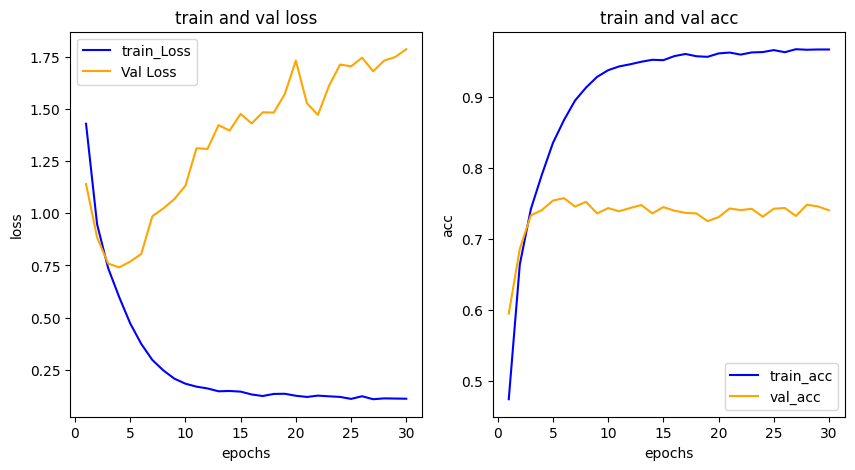

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# 모델 구성, 드롭아웃
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
# 모델 학습하기
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - acc: 0.4810 - loss: 1.4621 - val_acc: 0.6229 - val_loss: 1.1120
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.7178 - loss: 0.8038 - val_acc: 0.6656 - val_loss: 0.9755
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.7942 - loss: 0.5967 - val_acc: 0.6878 - val_loss: 0.9173
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.8334 - loss: 0.4776 - val_acc: 0.7505 - val_loss: 0.7840
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.8765 - loss: 0.3609 - val_acc: 0.7071 - val_loss: 0.9334
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - acc: 0.9108 - loss: 0.2605 - val_acc: 0.7432 - val_loss: 0.8791
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.9345 - loss: 0.1959 - val_acc: 0.7785 - val_loss: 0.7314
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.9474 - loss: 0.1538 - val_acc: 0.7497 - val_loss: 0.9406
Epoch 9/30
1094/1094 ━━━━━━━━━━━━━━━

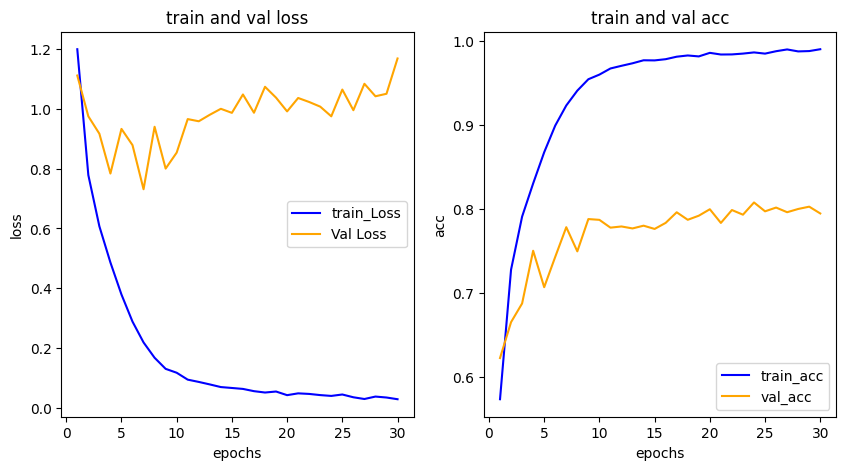

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()